# ABALONE CASE STUDY

Description:
    
    The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Data Desscription

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

The Target variable is 'Rings'.

In [5]:
#checking the shape of the data
df.shape

(4177, 9)

It contains 4177 rows and 9 columns.

In [6]:
#Lets check the data types of each column
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex- object type

Rings- integer

ALL Remaining columns - float

08 columns are numerical and 01 column(sex) is categorical.

In [8]:
#Checking null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

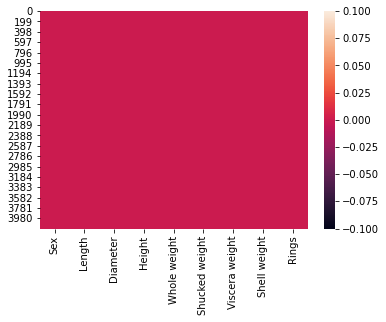

In [9]:
sns.heatmap(df.isnull())

There are no null values in our data set.

we know sex is categorized into Male, Female and Infant, lets see the distribution of this column.

In [10]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

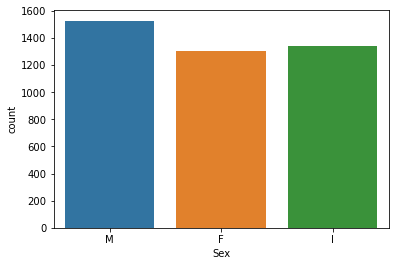

In [11]:
sns.countplot(x='Sex',data=df)

We can see that their are more number of male are present than female and infants. Infants have slightly more density than female.

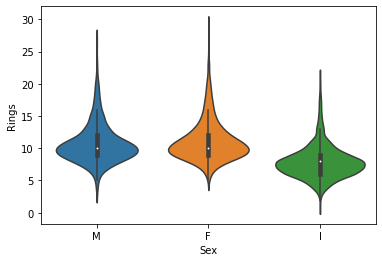

In [12]:
#lets see the distribution of sex with number of rings.
sns.violinplot(x='Sex',y='Rings',data=df)
plt.show()

    In Males majority in number of rings lies between 6-17.
    In Females it lies between 7-17.
    In Infants it lies between 4-10.

In [21]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
Obsservation:
    
    Minimum no. of rings is 1 and maximum is 29.
    Minimum height is 0.0 which is not possible therfore some outliers may be present in height column.
    Mean is slightly less than median in (length,diameter,height), data is slightly left skewed in these columns.

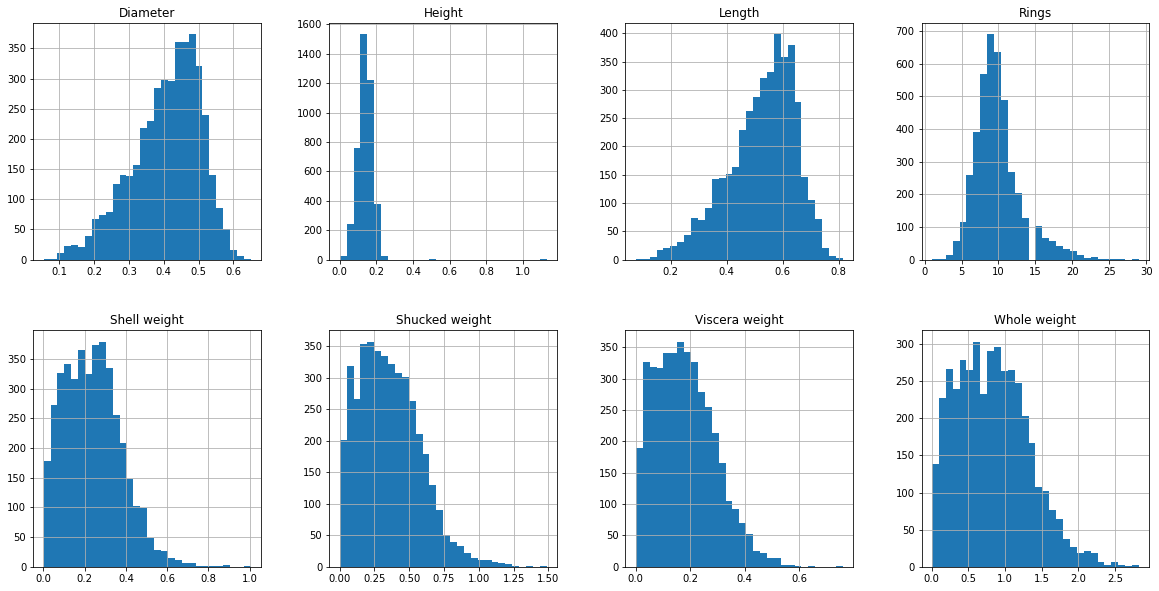

In [13]:
df.hist(figsize=(20,10), layout=(2, 4), bins = 30)
plt.show()

some skewness can be seen in the data.


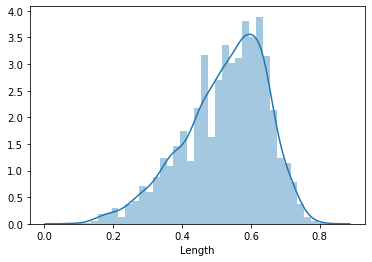

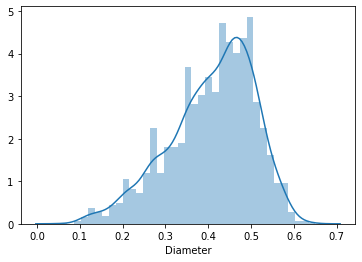

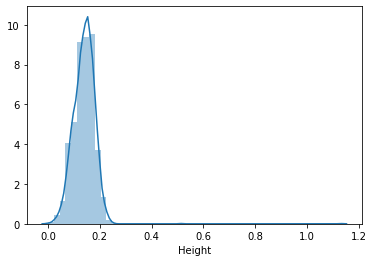

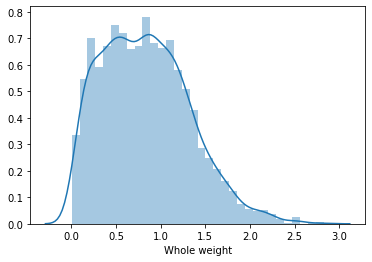

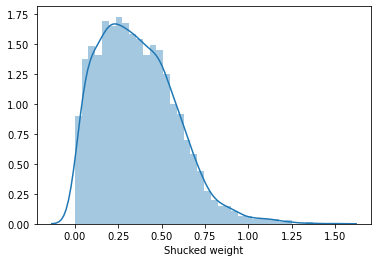

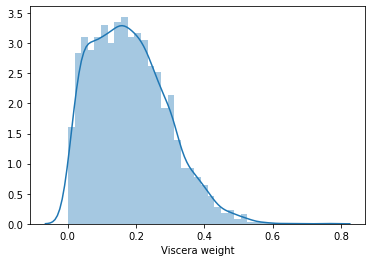

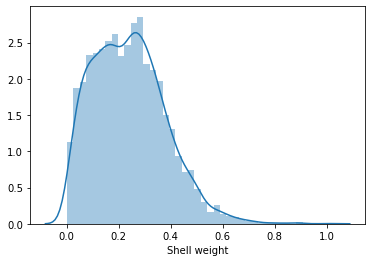

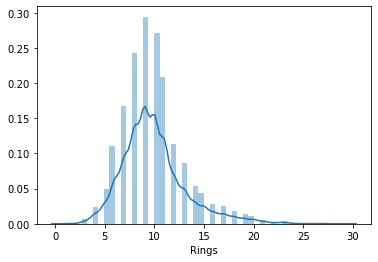

In [14]:
columns=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
for i in columns:
    plt.figure()
    sns.distplot(df[i],kde=True)
    plt.show()

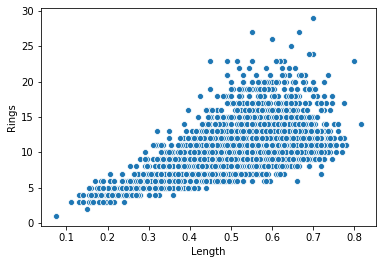

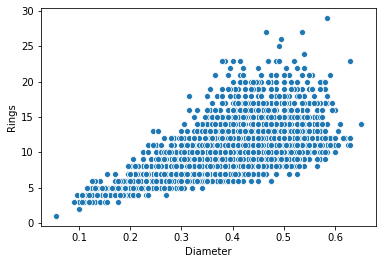

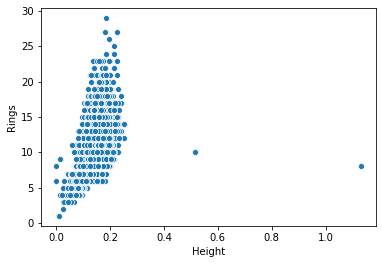

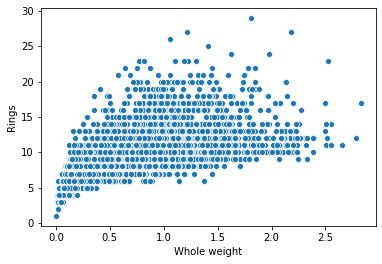

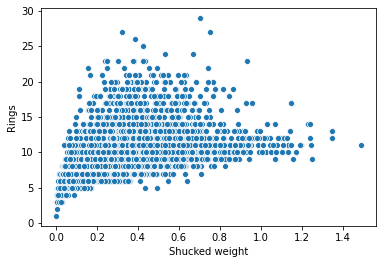

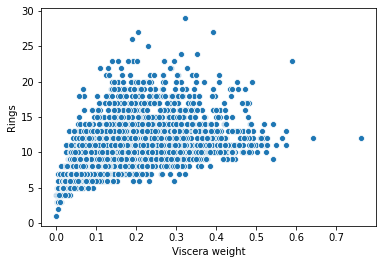

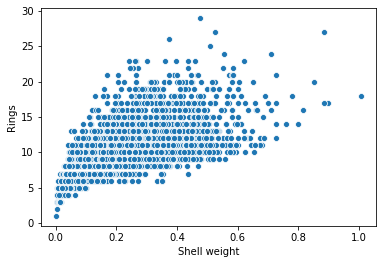

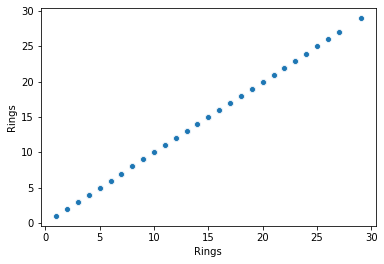

In [22]:
for i in columns:
    sns.scatterplot(x=i,y='Rings',data=df)
    plt.show()

we can see positive linear relation between Rings and other independent variables.

Some outliers can be seen in height column, some points are away from normal distribution of data.

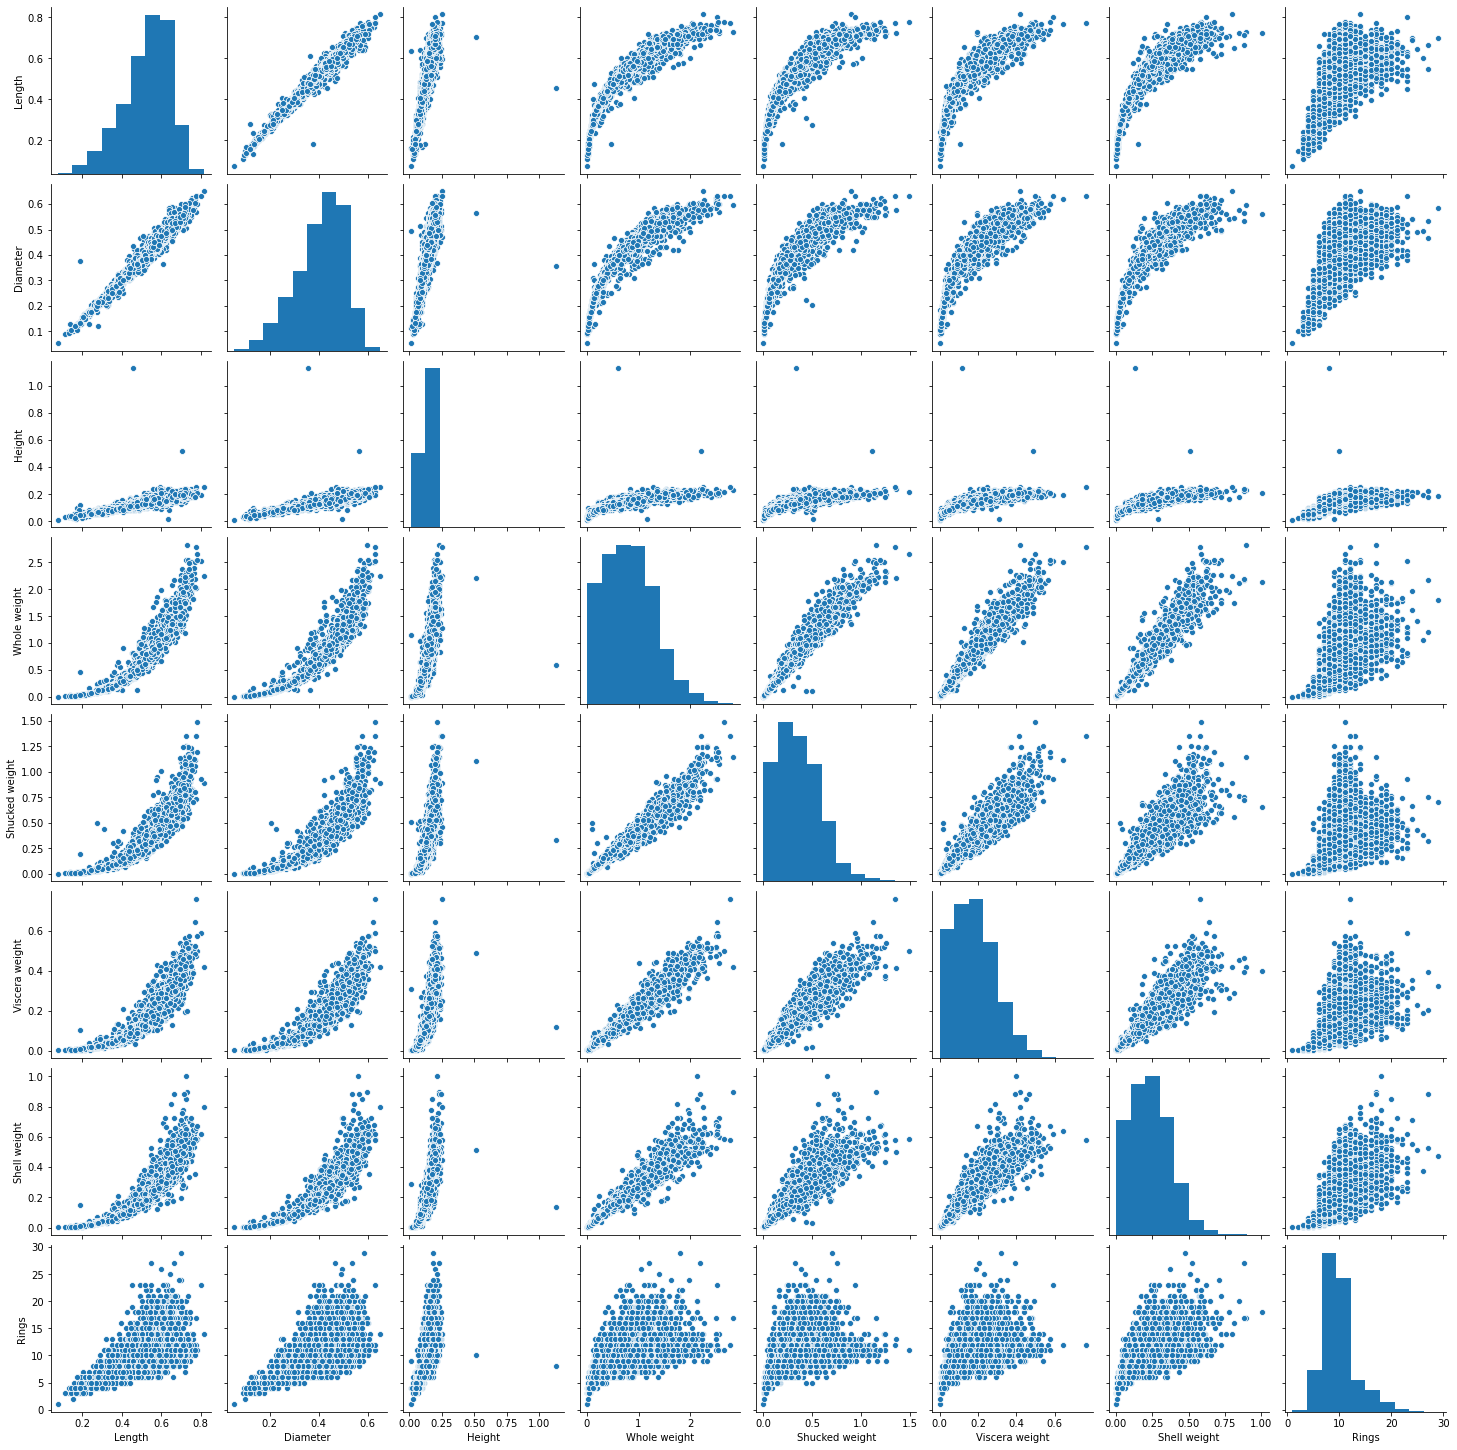

In [44]:
sns.pairplot(df)

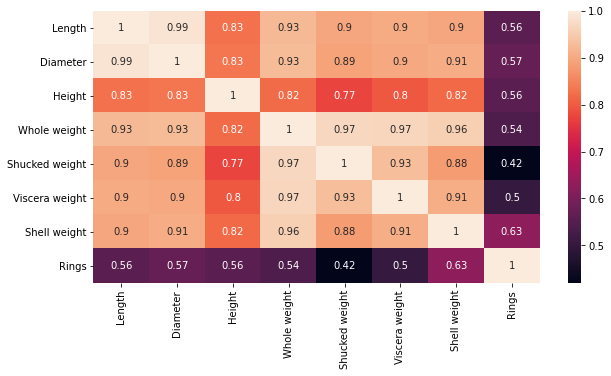

In [29]:
#checking correlation 
cor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)
plt.show()

Shell weight have the highest correlation and shucked weight have the least correlation with the number of rings.

In [32]:
#Checking outliers
#we have observed that the minimum height was 0.0 which is not possible, lets check the number of rows having 0 height
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


As there are only 2 rows with such data we can remove them.

In [33]:
df=df[df['Height']>0]

In [34]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


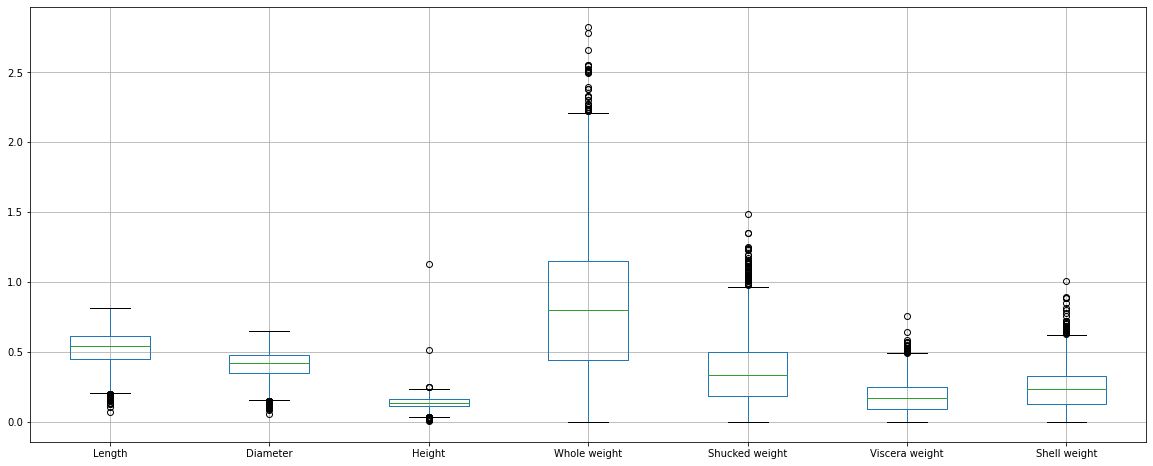

In [36]:
#checking outliers using boxplot
df.iloc[:,:-1].boxplot(figsize=(20,8))

ouliers are there but they are very close to the min and max range of the individual column.

Lets see the data loss if we remove them.

In [38]:
from scipy.stats import zscore
zscr=np.abs(zscore(df.iloc[:,1:]))

threshold=3
print(np.where(zscr>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1416, 1416, 1417, 1421, 1425, 1426, 1426, 1426, 1427, 1428,
       1428, 1527, 1753, 1755, 1756, 1758, 1760, 1761, 1761, 1761, 1762,
       1762, 1762, 1820, 1981, 1985, 1986, 1986, 2050, 2089, 2107, 2107,
       2113, 2113, 2156, 2160, 2175, 2179, 2198, 2200, 2207, 2208, 2273,
       2274, 2304, 2333, 2333, 2333, 2334, 2343, 2357, 2367, 2380, 2435,
       2458, 2470, 2543, 2622, 2623, 2623, 2623, 2

In [39]:
print('shape before removing the outliers:' , df.shape)

df_new=df[(zscr<3).all(axis=1)]

print('shape after removing outliers :', df_new.shape)

shape before removing the outliers: (4175, 9)
shape after removing outliers : (4027, 9)


In [43]:
print('data loss =',100-((4027/4175)*100))

data loss = 3.544910179640709


As data loss is only 3.5% we can go for oulier removal

In [45]:
df=df_new
df.shape

(4027, 9)

In [49]:
#lets check the skewness in data
df.iloc[:,1:].skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

Threshold for skewness is +/- 0.6.
All the columns are under threshold value.

In [58]:
#Transforming the cateforical column(Sex) to numerical.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [59]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [92]:
#Separating the x and y vaiables i.e the independt and the target variable.
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [93]:
x.shape,y.shape

((4027, 8), (4027,))

Spliting the train and test data, and finding the best random state for our model.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [95]:
lr=LinearRegression()
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxr2:
        maxr2=r2
        maxrs=i
print('Best r2_score is',maxr2,'on random state', maxrs)

Best r2_score is 0.5680869460014621 on random state 62


Lets split the data at random state 62.

In [96]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=62)

In [97]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3221, 8), (806, 8), (3221,), (806,))

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [102]:
ls=Lasso()
rd=Ridge()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [108]:
model=[lr,ls,rd,svr,knn,rf,ada]

for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    scores=cross_val_score(i, x, y, cv=5)
    print('Cross Validation Score:',scores.mean())



LinearRegression()
score: 0.5005435337803479
mean absolute error: 1.391075131563158
Root mean squared error: 1.8290200437575876
r2_score: 0.5680869460014621
Cross Validation Score: 0.41480204014861305


Lasso()
score: 0.0
mean absolute error: 2.1515793147173903
Root mean squared error: 2.7881243645468774
r2_score: -0.0036532234788606566
Cross Validation Score: -0.17380898822152022


Ridge()
score: 0.4928045075034623
mean absolute error: 1.4002264739702102
Root mean squared error: 1.8337812052792417
r2_score: 0.5658353748826109
Cross Validation Score: 0.40933039863283904


SVR()
score: 0.47837389632115845
mean absolute error: 1.3373120079303005
Root mean squared error: 1.8645552005412318
r2_score: 0.5511410480306205
Cross Validation Score: 0.4402557457448735


KNeighborsRegressor()
score: 0.653948255863861
mean absolute error: 1.3421836228287838
Root mean squared error: 1.8167541202646986
r2_score: 0.5738605821983354
Cross Validation Score: 0.43186050192621045


RandomForestRegressor(

KNeighborsRegressor is performing best among all.

# Hyper Parameter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [112]:
parameters={'n_neighbors':(3,5,7,10,12,15),'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),'weights':('uniform', 'distance')}
gcv=GridSearchCV(knn,parameters,cv=5)

In [113]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': (3, 5, 7, 10, 12, 15),
                         'weights': ('uniform', 'distance')})

In [114]:
#checking the best parameters
gcv.best_params_

{'algorithm': 'brute', 'n_neighbors': 15, 'weights': 'distance'}

In [115]:
predgcv=gcv.best_estimator_.predict(x_test)

In [117]:
print('mean absolute error:',mean_absolute_error(y_test,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgcv)))
print('r2_score:',r2_score(y_test,predgcv))

mean absolute error: 1.3195776970598212
Root mean squared error: 1.792466883939224
r2_score: 0.5851780945046713


In [118]:
#Saving the model
import joblib
joblib.dump(gcv.best_estimator_,'Abaloneknn.obj')

['Abaloneknn.obj']